This ipynb book is licensed under the MIT License.</br>
See http://opensource.org/licenses/MIT for more information.
    
Copyright (c) 2023 fred4code

# Covariance Matrix Calculation (Autocovariance) of an Image in Python

In the Python code that follows, we will perform a series of operations on an image to calculate and visualize its autocovariance matrix.

First, we load the image from a Google Drive path and convert it into grayscale. Converting the image to grayscale simplifies the image data by representing it in shades of gray. This simplification removes color information while retaining the intensity values, making it easier to perform subsequent mathematical operations.

Next, we resize the image to a specific size, maintaining its aspect ratio. This resizing step is done for didactic purposes to visualize a smaller image on the screen.

After resizing, we center the image by subtracting the mean pixel value from each pixel. Centering the image is a common preprocessing step in many data analysis tasks, including covariance matrix calculation. By centering the image, we ensure that the calculations are based on the variability of the pixels relative to their mean value, rather than relative to zero. This step helps to capture the true relationships and variations among the pixels.

The next step is the computation of the autocovariance matrix. The autocovariance matrix measures how each pixel in the image varies linearly together (covaries) with every other pixel. It provides insights into the structure and variability of the pixel intensities in the image. Specifically, it quantifies the self-linear relationship or dependence between different pixels, capturing information about how they change together.

Finally, we visualize the autocovariance matrix as a grayscale image. In order to enhance the visibility of the autocovariance values, which can potentially have negative and positive values ranging from less than -255 to greater than 255, we apply a Min-Max normalization. This normalization scales the values to the range of 0 to 255. A pixel value of 0 (black) represents the minimum autocovariance, indicating little linear relationship between pixels. Conversely, a pixel value of 255 (white) represents the maximum autocovariance, indicating a strong linear relationship between pixels. By applying this normalization, we are able to better discern the patterns and variations in the autocovariance matrix, gaining insights into the structure and relationships among the pixels in the image.

This process of calculating and visualizing the autocovariance matrix is useful in image analysis tasks, where understand the relationships and variability among the pixels in an image is considered important.

## Formula

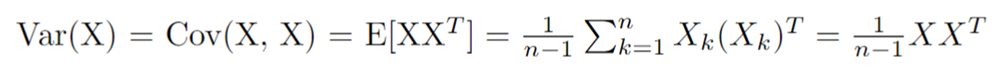

where:</br>
<b>X</b> is a centered matrix

## Implementation

In [ ]:
# Google Colab is a cloud-based Python development environment. The drive module allows you to access Google Drive files.
from google.colab import drive

# This line mounts your Google Drive in the '/content/gdrive' directory.
drive.mount('/content/gdrive', force_remount=True)

In [ ]:
# OpenCV is a library of programming functions mainly aimed at real-time computer vision.
import cv2

# This module in Google Colab helps to display images.
from google.colab.patches import cv2_imshow

# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np

# Load the image
# Here, the image is being loaded from your Google Drive (so put an image in your Colab Notebooks directory) in grayscale format.
image = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/_YOUR_IMAGE_TO_CALCULATE_ITS_COVARIANCE_",cv2.IMREAD_GRAYSCALE)

# Get the dimensions of the image
# This prints the dimensions of the loaded image.
dimensions = image.shape
print(dimensions)

# resize image
# Define the desired width and calculate the corresponding height
desired_width = 200
aspect_ratio = image.shape[1] / image.shape[0]
desired_height = int(desired_width / aspect_ratio)

# Resize the image with the desired width and height
resized_image = cv2.resize(image, (desired_width, desired_height))

In [ ]:
# Display the image
# The resized image is displayed.
cv2_imshow(image)

In [ ]:
# Display the transpose of the image.
cv2_imshow(image.T)

In [ ]:
# center the image
# The image is "centered" by subtracting the mean of the image from each pixel. This step is important for the upcoming covariance computation.
image_centered = image - np.mean(image, axis=0)

In [ ]:
# Display the centered image with a min-max normalization between 0 and 255
cv2_imshow(image_centered)

## Covariance matrix of the rows

In [ ]:
# This line of code calculates the covariance matrix of the rows of the not trasposed centered image.
# The result is a square matrix where each entry (i, j) represents the covariance between row i and row j of the not trasposed centered image.
# It quantifies how much two different rows (or, in the context of an image, horizontal pixel lines) change together.

# Let's dissect the equation a bit more:
# np.dot(image_centered, image_centered.T) computes the dot product of the centered image with its own transpose.
# The dot product operation essentially computes the sum of products of each row of the not trasposed centered image matrix with every other column of the transposed centered image matrix.
# (Being transposed, the columns of the transposed centered image matrix are the rows of the not transposed centered image matrix, so we can also say:
# "This operation essentially computes the sum of products of each row with each other row of the not transposed centered image")
# While this raw result is not yet a covariance, it's an important intermediate step in the computation.
# It represents a measure of how each row in the not transposed centered image varies linearly with every other row, capturing their relationship.

# In this case, since we are calculating the covariance matrix of the not transposed centered image matrix with itself, it can also be referred to as the autocovariance matrix.
# Autocovariance quantifies the self-linear-relationship or self-linear-dependence between different rows (or horizontal pixel lines) in the image.

# Why do we need to normalize (in this case, by dividing by the degrees of freedom: image_centered.shape[0] - 1)?
# Dividing by the number of degrees of freedom (image_centered.shape[0] - 1) ensures that the covariance matrix provides an unbiased estimate of the autocovariance.

# After this normalization step, we obtain the autocovariance matrix, which quantifies the pairwise autocovariances between every pair of rows in the image.
# This autocovariance matrix provides valuable insights into the structure and variability of the pixel intensities in the image.
covariance_matrix = np.dot(image_centered, image_centered.T) / (image_centered.shape[0] - 1)

In [ ]:
# Visualization of the covariance matrix of the rows with a min-max normalization between 0 and 255
min_val = np.min(covariance_matrix)
max_val = np.max(covariance_matrix)
normalized_matrix = (covariance_matrix - min_val) / (max_val - min_val) * 255
cv2_imshow(normalized_matrix)